In [ ]:
!pip install gtsam

In [1]:
from __future__ import print_function

import math
import unittest
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import linalg, matrix

from sympy import Matrix
from mpl_toolkits.mplot3d import Axes3D  # pylint: disable=W0611

import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
import mpl_toolkits.mplot3d.axes3d as p3

# Required to do animations in colab
from matplotlib import animation
from IPython.display import HTML
from mobileManipulator import FourLinkMM
import gtsam
import gtsam.utils.plot as gtsam_plot
from gtsam import Pose2
import shapely
from shapely.geometry import Polygon
from shapely import affinity
from utils import *

In [2]:
def visualize_tree(env, graph, graph_dictionary):
    plt.figure()
    for edge in graph.edges:
        parent_idx, child_idx = edge
        end_eff_p = graph_dictionary[parent_idx]
        end_eff_c = graph_dictionary[child_idx]
        plt.plot([end_eff_p.x(), end_eff_c.x()], [end_eff_p.y(), end_eff_c.y()], "ro-", markersize=2)
    for obstacle in env.obstacles:
        plt.plot(*obstacle.exterior.xy)
    plt.show()

In [3]:
def plot_environment(arm, env, goal):
    base, link_1, link_2, link_3, link_4 = arm.create_manipulator_model(Pose2(0, 0, 0), vector4(0, 0, 0, 0))
    plt.figure()
    plt.plot(*base.exterior.xy)
    plt.plot(*link_1.exterior.xy)
    plt.plot(*link_2.exterior.xy)
    plt.plot(*link_3.exterior.xy)
    plt.plot(*link_4.exterior.xy)
    for obstacle in env.obstacles:
        plt.plot(*obstacle.exterior.xy)
    plt.plot(goal.x(), goal.y(), marker="o", markersize=6)
    plt.show()

# Setup Environment with obstacles

In [5]:
from rrt_manipulator import *
max_x = 60
max_y = 60
QStart = Pose2(10, 0, 0)
start_config = (Pose2(0, 0, 0), vector4(0, 0, 0, 0), QStart)
arm = FourLinkMM()

In [ ]:
obstacles = [shapely.geometry.box(10, 10, 14, 14), shapely.geometry.box(25, 8, 35, 18), shapely.geometry.box(10, 35, 15, 40), shapely.geometry.box(33, 33, 38,38)]
env = Environment(max_x, max_y, obstacles=obstacles)
QGoal = Pose2(40, 25, np.pi/2)
plot_environment(arm, env, QGoal)

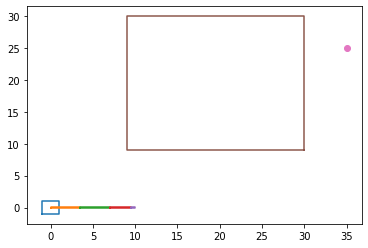

In [30]:
obstacles1 = [shapely.geometry.box(9, 9, 30, 30)]
QGoal = Pose2(35, 25, 0)
env = Environment(max_x, max_y, obstacles=obstacles1)
plot_environment(arm, env, QGoal)

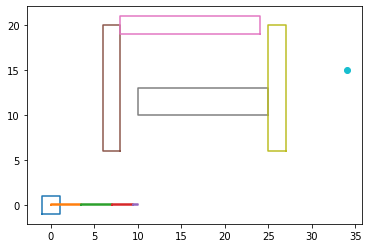

In [6]:
QGoal = Pose2(34, 15, np.pi)
obstacles2 = [shapely.geometry.box(6, 6, 8, 20), shapely.geometry.box(8, 19, 24, 21), shapely.geometry.box(10, 10, 25, 13), shapely.geometry.box(25, 6, 27, 20)]
env = Environment(max_x, max_y, obstacles=obstacles2, num_obstacles=7, obstacle_size = 8)
plot_environment(arm, env, QGoal)

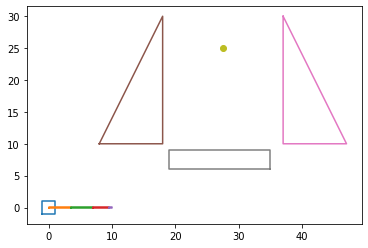

In [6]:
QGoal = Pose2(27.5, 25, 0)
obstacles3 = [Polygon([(8, 10), (18, 10), (18, 30)]), Polygon([(37, 30), (37, 10), (47, 10)]), shapely.geometry.box(19, 6, 35, 9)]
env = Environment(max_x, max_y, obstacles=obstacles3)
plot_environment(arm, env, QGoal)

# Run RRT

In [8]:
path, graph_dictionary, graph = RRT(start_config, QGoal, env, arm, lim=0.5, step_size=1.5, num_iters=6000)

ITERATION: 0
ITERATION: 10
rand config in collision
rand config in collision
ITERATION: 20
rand config in collision
rand config in collision
rand config in collision
ITERATION: 30
rand config in collision
ITERATION: 40
rand config in collision
rand config in collision
ITERATION: 50
rand config in collision
rand config in collision
ITERATION: 60
rand config in collision
rand config in collision
ITERATION: 70
ITERATION: 80
rand config in collision
ITERATION: 90
rand config in collision
rand config in collision
ITERATION: 100
ITERATION: 110
rand config in collision
rand config in collision
rand config in collision
rand config in collision
rand config in collision
rand config in collision
rand config in collision
ITERATION: 120
rand config in collision
rand config in collision
ITERATION: 130
rand config in collision
rand config in collision
ITERATION: 140
rand config in collision
ITERATION: 150
rand config in collision
rand config in collision
ITERATION: 160
rand config in collision
ITERAT

Actual path: [((0, 0, 0)
, array([0., 0., 0., 0.]), (10, 0, 0)
), ((9.42647, 1.93447, 2.13982)
, array([-1.34255945,  2.74990107,  1.91544085,  0.82067404]), (10.8602, 1.22885, 0)
), ((11.8983, -0.978671, -0.913852)
, array([2.61892763, 0.64607253, 2.79084145, 1.10582748]), (10.5083, 2.68656, -0.0354073)
), ((19.4394, 3.02112, -0.445451)
, array([-2.29662395, -0.62667295, -0.43718579, -2.58200699]), (11.3339, 3.93697, -0.104848)
), ((16.4769, 5.02352, 0.987662)
, array([ 0.85381058,  2.49293138, -1.20603668,  3.05598928]), (12.2472, 5.12689, -0.0989252)
), ((19.4293, 3.12381, -0.134291)
, array([-2.82109292, -1.50358166,  1.11637842, -3.03351448]), (13.1605, 6.3168, -0.093002)
), ((16.2575, -0.994869, 1.53809)
, array([-0.2191844 ,  0.78289861,  0.13688239, -2.41630734]), (14.3012, 7.28718, -0.177529)
), ((17.6905, -1.82334, -1.37067)
, array([-3.09142341, -0.01091844,  0.01648505, -1.8841862 ]), (15.7973, 7.34265, -0.0847411)
), ((8.50466, 5.56082, -1.19445)
, array([ 2.21217012, -1.6

# Tree Visualization

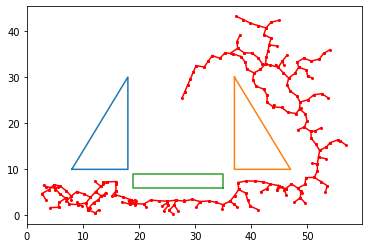

In [9]:
visualize_tree(env, graph, graph_dictionary)

In [10]:
end_effector_path_x = []
end_effector_path_y = []
for node in path:
    end_effector_path_x.append(node[2].x())
    end_effector_path_y.append(node[2].y())
fig = plt.figure()
fig.set_dpi(100)
ax = plt.axes(xlim=(-5, max_x), ylim=(-5, max_y))
plt.rc('animation', html='jshtml') # needed for animations!
#ax = plt.axes()
plt.close()
N = len(path)
# size=10.5
len_b = 2
d = np.sqrt(2*len_b*len_b/4)
omega = 2*math.pi/N
# arm = FourLinkMM()
# arm.x_b = 0
# arm.y_b = 0
# arm.theta_b = 0
q = np.radians(vector4(90,30,45,0))
sTt_initial = arm.fwd_kinematics(q)
print(sTt_initial)
print(q)
# ax.legend()

(-4.64778, 7.30755, 2.87979)

[1.57079633 0.52359878 0.78539816 0.        ]


In [11]:
def init():

  # For animation
    rect = mpatches.Rectangle([arm.x_b-d*np.cos(arm.theta_b+np.radians(45)),arm.y_b-d*np.sin(arm.theta_b+np.radians(45))], len_b, len_b, angle = arm.theta_b*180/np.pi)
    ax.plot(QGoal.x(), QGoal.y(), marker="o", markersize=8)
    #     ax.add_patch(rect)
#     ax.add_patch(link_1)
#     ax.add_patch(link_2)
#     ax.add_patch(link_3)
#     ax.add_patch(link_4)
#     ax.add_patch(mpatches.FancyArrow(arm.x_b,arm.y_b, 1.5*np.cos(arm.theta_b), 1.5*np.sin(arm.theta_b), color='r',head_width = 0.3))

    return rect,


def animate(i):

    global path
    global end_effector_path_x
    global end_effector_path_y
    global arm
    global q
    global prev_pose
    global curr_pose
    global env
    # Computes the forward kinematics to get the pose of the end-effector for the given angular position of the joints (q)
    base, q, end_effector = path[i]
    #     base, q = arm.ik2(poses[i])
    arm.update_manipulator_model(base, q)
    sTt = arm.fwd_kinematics(q)

    # Get the jacobian of the arm at the given pose
    # ------------------------- ANIMATION ----------------------------------------------------
    rect = mpatches.Rectangle([arm.x_b-d*np.cos(arm.theta_b+np.radians(45)),arm.y_b-d*np.sin(arm.theta_b+np.radians(45))],
                    len_b, len_b, angle = arm.theta_b*180/np.pi, color = 'b')
    #ax.clear()
    ax.clear()
    for obstacle in env.obstacles:
        ax.plot(*obstacle.exterior.xy)
    ax.plot(end_effector_path_x, end_effector_path_y, "ro-", markersize=2)
#     if prev_pose is None:
#         obj = ax.plot(curr_pose.x(), curr_pose.y(), marker="o", markersize=3)
#     #         ax.add_artist(obj)
#         prev_pose = curr_pose
#         curr_pose = poses[i + 1]
#     else:
#         obj = ax.plot([prev_pose.x(), curr_pose.x()], [prev_pose.y(), curr_pose.y()], "ro-", markersize=3)
#     #         ax.add_artist(obj)
#         prev_pose = curr_pose
#     if i + 1 < len(poses):
#         curr_pose = poses[i + 1]
    ax.add_patch(rect)
    
    #link 1
    sXl1 = Pose2(0, 0, arm.theta_b)
    l1Zl1 = Pose2(0, 0, q[0])
    l1Xl2 = Pose2(arm.L1, 0, 0)
    sTl2 = compose(sXl1, l1Zl1, l1Xl2)
    t1 = sTl2.translation()

    #link 2
    l2Zl2 = Pose2(0, 0, q[1])
    l2Xl3 = Pose2(arm.L2, 0, 0)
    sTl3 = compose(sTl2, l2Zl2, l2Xl3)
    t2 = sTl3.translation()

    #link 3
    l3Zl3 = Pose2(0, 0, q[2])
    l3X4 = Pose2(arm.L3, 0, 0)
    sTl4 = compose(sTl3, l3Zl3, l3X4)
    t3 = sTl4.translation()

    #link 4
    l4Zl4 = Pose2(0, 0, q[3])
    l4Xt = Pose2(arm.L4, 0, 0)
    sTt = compose(sTl4, l4Zl4, l4Xt)
    t4 = sTt.translation()
    
    #link 1
#     sXl1 = Pose2(0, 0, arm.theta_b)
#     l1Zl1 = Pose2(0, 0, q[0])
#     l1Xl2 = Pose2(arm.L1, 0, 0)
#     sTl2 = compose(sXl1, l1Zl1, l1Xl2)
#     t1 = sTl2.translation()
    ax.add_artist(mpatches.Rectangle([arm.x_b,arm.y_b], 3.5, 0.1, angle =np.rad2deg(arm.theta_b+q[0]), color='r'))
    
    #link2
#     l2Xl3 = Pose2(arm.L2, 0, 0)
#     sTl3 = compose(sTl2, l2Zl2, l2Xl3)
#     t2 = sTl3.translation()
    ax.add_artist(mpatches.Rectangle([t1.x()+arm.x_b,t1.y()+arm.y_b], 3.5, 0.1, angle =np.rad2deg(arm.theta_b+q[0]+q[1]), color='g'))

    #link3
#     l3Zl3 = Pose2(0, 0, q[2])
#     l3X4 = Pose2(arm.L3, 0, 0)
#     sTl4 = compose(sTl3, l3Zl3, l3X4)
#     t3 = sTl4.translation()
    ax.add_artist(mpatches.Rectangle([t2.x()+arm.x_b,t2.y()+arm.y_b], 2.5, 0.1, angle = np.rad2deg(arm.theta_b+q[0]+q[1]+q[2]), color='b'))

    #link4
#     l4Zl4 = Pose2(0, 0, q[3])
#     l4Xt = Pose2(arm.L4, 0, 0)
#     sTt = compose(sTl4, l4Zl4, l4Xt)
#     t4 = sTt.translation()
    ax.add_artist(mpatches.Rectangle([t3.x()+arm.x_b,t3.y()+arm.y_b], 0.5, 0.1, angle =np.rad2deg(arm.theta_b+q[0]+q[1]+q[2]+q[3]), color='k'))


    return rect, 

# Animation

In [12]:
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=N, interval=500, blit=False)

In [12]:
ani = animation.FuncAnimation(fig, animate, init_func=init,
                        frames=N, interval=500, blit=False)

# plt.show()

In [13]:
ani.save('rrt_animation_env3_1.gif', writer='imagemagick', fps=2)